In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


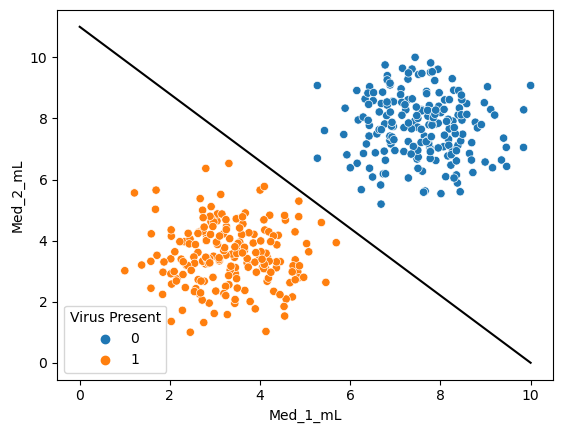

In [11]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present',
               data = df)

x = np.linspace(0,10,100)
m = -1.1
b = 11
y = m*x + b

plt.plot(x,y, 'black')

In [12]:
from sklearn.svm import SVC

In [13]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [14]:
y = df['Virus Present']


In [16]:
X = df.drop('Virus Present', axis = 1)

In [26]:
model = SVC (kernel = 'linear', C = 1000)

In [27]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [28]:
from svm_margin_plot import plot_svm_boundary

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


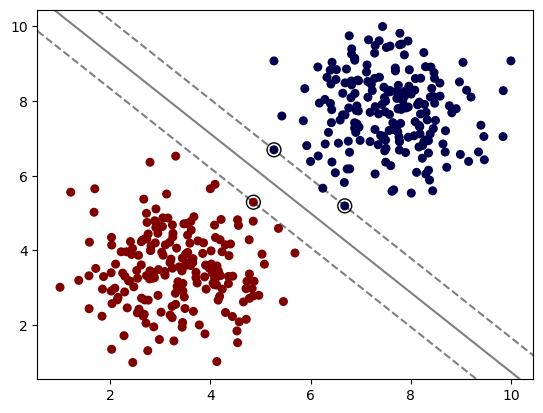

In [29]:
plot_svm_boundary(model,X,y)

In [48]:
model = SVC(kernel = 'rbf', C= 1, gamma = 'scale')

In [49]:
model.fit(X,y)

SVC(C=1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


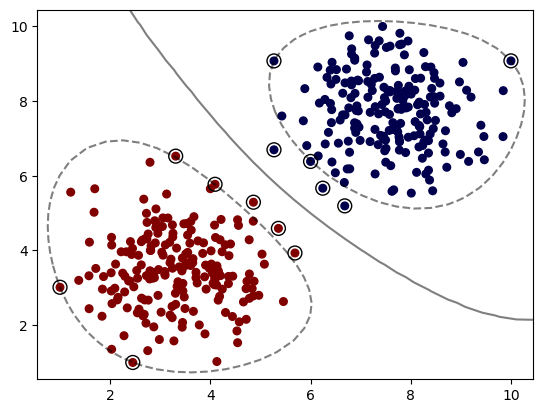

In [50]:
plot_svm_boundary(model, X, y)

In [51]:
model = SVC(kernel = 'sigmoid')

In [52]:
model.fit(X,y)

SVC(kernel='sigmoid')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


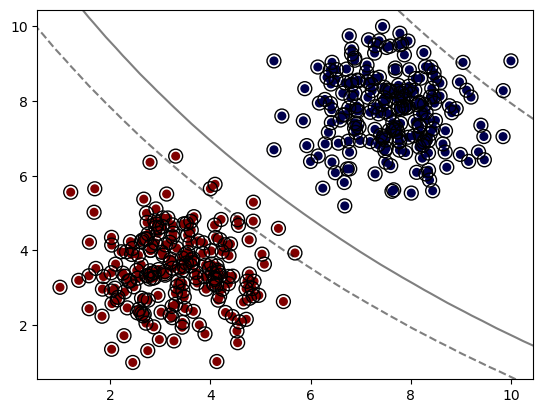

In [53]:
plot_svm_boundary(model,X,y)

In [57]:
model = SVC(kernel = 'poly', degree = 4, C = 0.05)

In [58]:
model.fit(X,y)

SVC(C=0.05, degree=4, kernel='poly')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


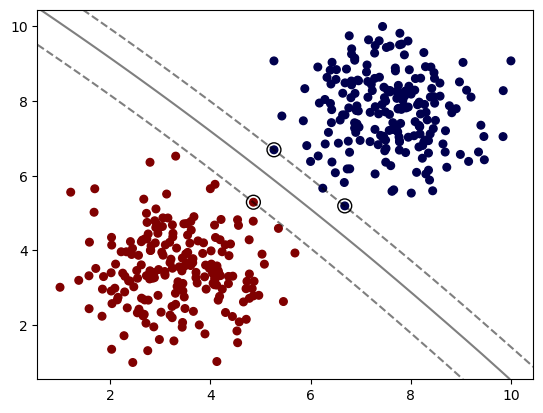

In [59]:
plot_svm_boundary(model, X, y)

In [60]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

In [63]:
svm = SVC()
param_grid = { 'C':[0.01, 0.1, 1], 'kernel':['linear', 'rbf']}

In [64]:
grid = GridSearchCV(svm, param_grid)

In [65]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [66]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}